In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
Data=pd.read_csv('Data/Hayes_Roth.csv')
Data.head()

,Index,Name,Hobby,Age,Educational level,Marital status,Class
0,0,10,2,1,3,2,2
1,1,83,3,1,4,1,3
2,2,61,2,4,2,2,3
3,3,107,1,1,3,4,3
4,4,113,1,1,3,2,2


In [3]:
Data.isna().sum()

Index                0
Name                 0
Hobby                0
Age                  0
Educational level    0
Marital status       0
Class                0
dtype: int64

In [4]:
Data.describe()

,Index,Name,Hobby,Age,Educational level,Marital status,Class
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,65.000000,66.305344,2.000000,1.961832,1.961832,1.954198,1.847328
std,37.960506,38.330324,0.822753,0.947909,0.947909,0.951619,0.769348
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,32.500000,33.500000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,65.000000,66.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,97.500000,99.500000,3.000000,2.000000,2.000000,2.000000,2.000000
max,130.000000,132.000000,3.000000,4.000000,4.000000,4.000000,3.000000


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Index              131 non-null    int64
 1   Name               131 non-null    int64
 2   Hobby              131 non-null    int64
 3   Age                131 non-null    int64
 4   Educational level  131 non-null    int64
 5   Marital status     131 non-null    int64
 6   Class              131 non-null    int64
dtypes: int64(7)
memory usage: 7.3 KB


In [6]:
pandas_profiling.ProfileReport(Data)

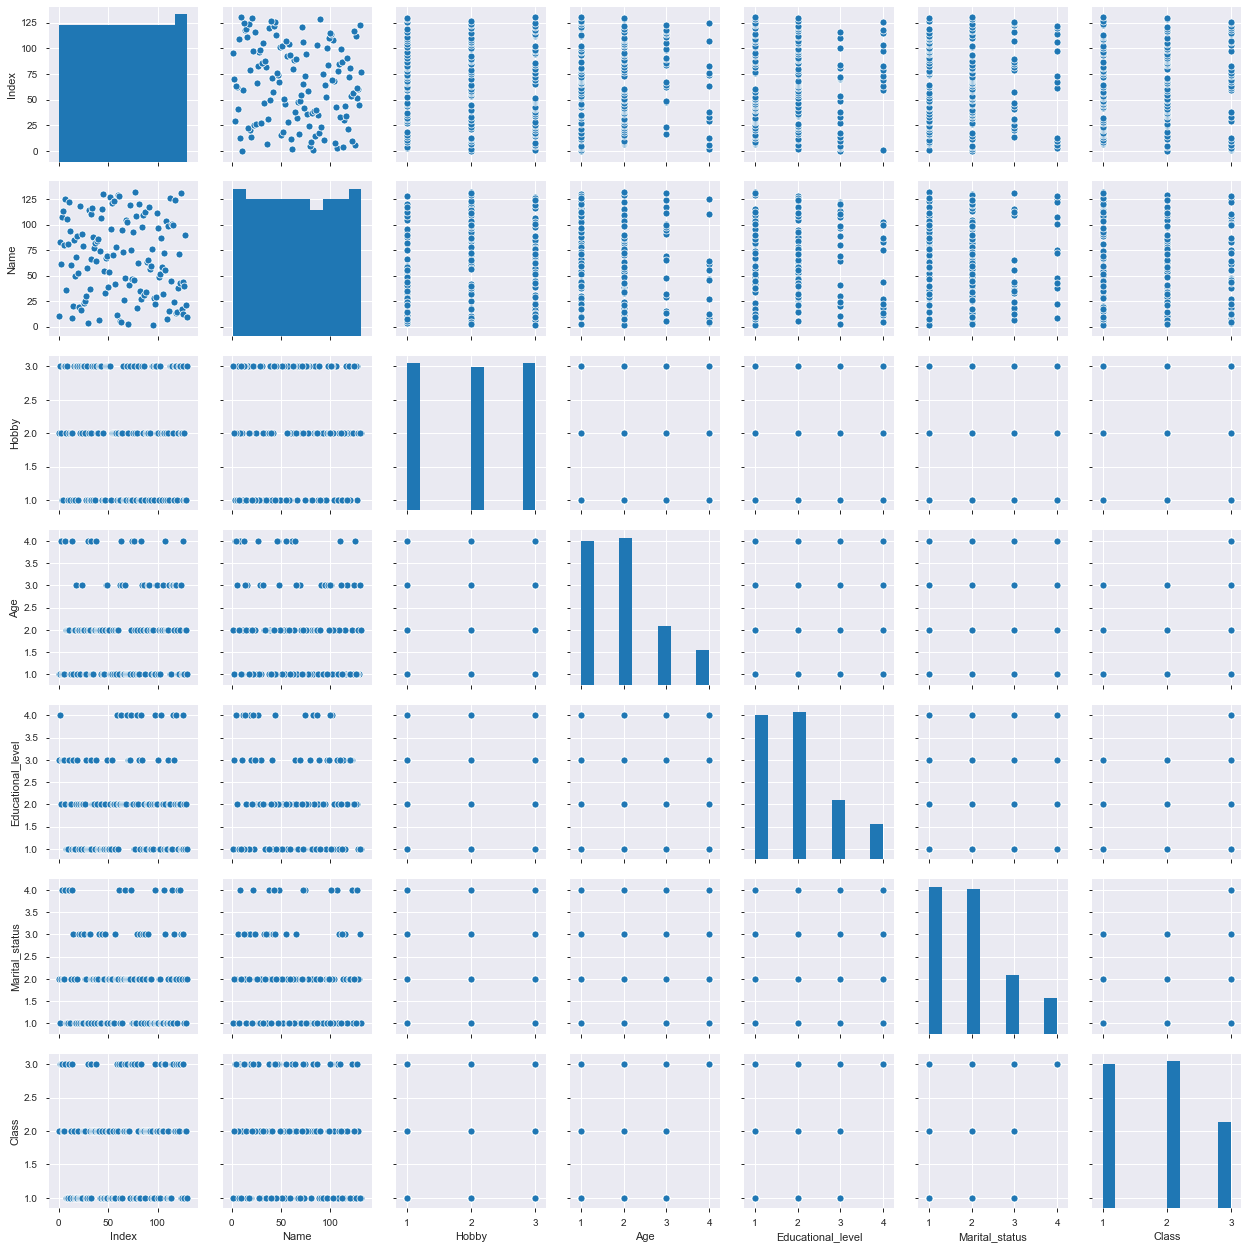

In [7]:
sns.pairplot(Data)

In [8]:
Data.head(1)

,Index,Name,Hobby,Age,Educational_level,Marital_status,Class
0,0,10,2,1,3,2,2


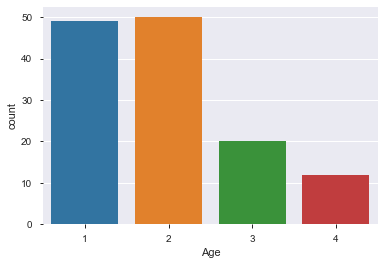

In [9]:
sns.countplot(Data.Age)

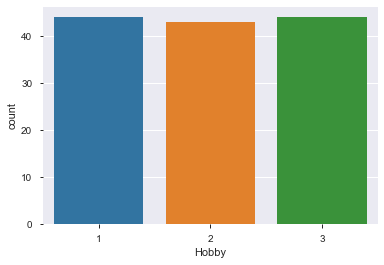

In [10]:
sns.countplot(Data.Hobby)

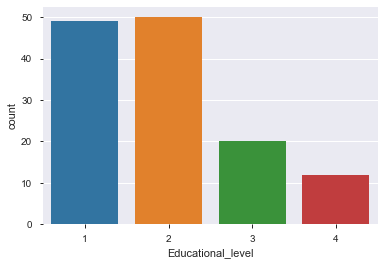

In [11]:
sns.countplot(Data.Educational_level)

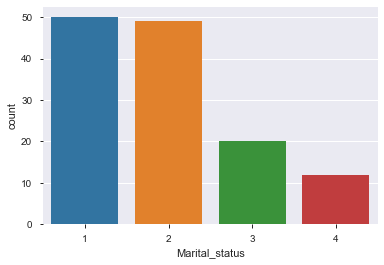

In [12]:
sns.countplot(Data.Marital_status)

In [13]:
from sklearn.preprocessing import RobustScaler

In [14]:
Features= Data.drop(Data[['Class']], axis=1)
Features.head()

,Index,Name,Hobby,Age,Educational_level,Marital_status
0,0,10,2,1,3,2
1,1,83,3,1,4,1
2,2,61,2,4,2,2
3,3,107,1,1,3,4
4,4,113,1,1,3,2


In [17]:
Target= Data['Class']
Target.head()

0    2
1    3
2    3
3    3
4    2
Name: Class, dtype: int64

In [18]:
RS= RobustScaler()

In [19]:
X_Data=RS.fit_transform(Features)
X_Data

array([[-1.        , -0.84848485,  0.        , -1.        ,  1.        ,
         0.        ],
       [-0.98461538,  0.25757576,  0.5       , -1.        ,  2.        ,
        -1.        ],
       [-0.96923077, -0.07575758,  0.        ,  2.        ,  0.        ,
         0.        ],
       [-0.95384615,  0.62121212, -0.5       , -1.        ,  1.        ,
         2.        ],
       [-0.93846154,  0.71212121, -0.5       , -1.        ,  1.        ,
         0.        ],
       [-0.92307692,  0.21212121,  0.5       , -1.        ,  1.        ,
         0.        ],
       [-0.90769231,  0.89393939,  0.5       ,  2.        ,  0.        ,
         2.        ],
       [-0.89230769, -0.45454545,  0.        ,  0.        , -1.        ,
        -1.        ],
       [-0.87692308,  0.59090909,  0.5       ,  0.        , -1.        ,
        -1.        ],
       [-0.86153846,  0.22727273, -0.5       ,  0.        , -1.        ,
        -1.        ],
       [-0.84615385,  0.84848485,  0.        ,  0.

## Without Train and Test

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
Lr=LogisticRegression()

In [22]:
Lr.fit(X_Data,Target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
Lr.score(X_Data, Target)
        

0.5801526717557252

### With Train and Test Data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,Y_train,Y_test= train_test_split(X_Data, Target, test_size=0.18)

In [26]:
X_train.shape

(107, 6)

In [27]:
X_test.shape

(24, 6)

In [28]:
Y_train.shape

(107,)

In [29]:
Y_test.shape

(24,)

In [30]:
Model = LogisticRegression(solver='lbfgs')

In [31]:
Model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
Model.score(X_train,Y_train)

0.6261682242990654

In [33]:
Model.score(X_test,Y_test)

0.5416666666666666

In [34]:
New_Pred= Model.predict(X_test)
New_Pred

array([1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 3, 3, 1, 3, 1, 3, 1, 1,
       2, 2], dtype=int64)

In [35]:
pd.DataFrame({'Actual_Data': Y_test, 'New_Prediction': New_Pred})

,Actual_Data,New_Prediction
4,2,1
42,1,1
115,3,3
36,2,1
124,1,2
56,1,1
96,1,2
75,1,1
35,2,1
26,2,1


In [36]:
Model.predict_proba(X_test)

array([[0.57400088, 0.28437049, 0.14162863],
       [0.59885475, 0.39446382, 0.00668143],
       [0.08225024, 0.26473902, 0.65301074],
       [0.57744711, 0.38891837, 0.03363452],
       [0.38851731, 0.60436772, 0.00711498],
       [0.63644594, 0.35766235, 0.00589171],
       [0.45141779, 0.54194484, 0.00663737],
       [0.57323438, 0.42068931, 0.00607631],
       [0.57475778, 0.39276222, 0.03247999],
       [0.486163  , 0.47488265, 0.03895436],
       [0.41210212, 0.55891222, 0.02898566],
       [0.42614362, 0.56738939, 0.006467  ],
       [0.40458306, 0.58864622, 0.00677072],
       [0.59190429, 0.40077733, 0.00731838],
       [0.02233589, 0.22915625, 0.74850786],
       [0.08159557, 0.10384844, 0.814556  ],
       [0.51635936, 0.32230745, 0.1613332 ],
       [0.0244527 , 0.23291411, 0.7426332 ],
       [0.54859729, 0.44455968, 0.00684303],
       [0.01726871, 0.14784481, 0.83488649],
       [0.57855135, 0.38949344, 0.03195521],
       [0.58342642, 0.4108861 , 0.00568748],
       [0.

In [ ]:
# Confusion matrix
# Classifaction report 